# Exercise 3.1.18 Interpolation polynom with Newton's divided differences
The data specify the lifetime of a machine part when it is used at a certain temperature. Calculate the expected lifetime for operation at 70°C from an interpolation with a quadratic function using the last three data points as well as from a cubic polynom.

In [1]:
%run ../../tools/projini.py

from math import *
%matplotlib inline
from numpy import *
import matplotlib.pylab as pyl

In [2]:
# Given quantities
temp = array([25.,40.,50.,60.]) # temperature [°C]
life = array([95.,75.,63.,54.]) # lifetime    [1000 hours]

x = temp  # convenience
# temperature range for plotting
x_pl = linspace(20,80,101)

## a) Interpolation with quadratic polynom

In [3]:
f_1 = life[1]; f_2 = life[2]; f_3 = life[3]

f_1_2 = (f_2 - f_1)/(x[2] - x[1])
f_2_3 = (f_3 - f_2)/(x[3] - x[2])

f_1_2_3 = (f_2_3 - f_1_2)/(x[3] - x[1])

In [4]:
print "Coefficients: ", f_1, f_1_2, f_1_2_3

Coefficients:  75.0 -1.2 0.015


In [5]:
L_2 = lambda xi: f_1 + f_1_2*(xi - x[1]) + f_1_2_3*(xi - x[1])*(xi - x[2])

In [6]:
print "L_2(x)=\t%.4f" \
               "\n\t%+.4f*(x%+.2f)" \
               "\n\t%+.4f*(x%+.2f)(x%+.2f)" \
      % (f_1, f_1_2, -x[1], f_1_2_3, -x[1], -x[2])

L_2(x)=	75.0000
	-1.2000*(x-40.00)
	+0.0150*(x-40.00)(x-50.00)


In [7]:
l2_70 = L_2(70)
print "Expected lifetime at 70°C: %.2f x1000 hours." % (l2_70,)

Expected lifetime at 70°C: 48.00 x1000 hours.


In [8]:
# Lifetimes for plotting
l2_pl = L_2(x_pl)

## b) Interpolation with cubic polynom

In [9]:
f_0 = life[0]

f_0_1 = (f_1 - f_0)/(x[1] - x[0])

f_0_1_2 = (f_1_2 - f_0_1)/(x[2] - x[0])

f_0_1_2_3 = (f_1_2_3 - f_0_1_2)/(x[3] - x[0])

In [10]:
print "Coefficients: ", f_0, f_0_1, f_0_1_2, f_0_1_2_3

Coefficients:  95.0 -1.33333333333 0.00533333333333 0.00027619047619


In [11]:
L_3 = lambda xi: f_0 \
                 + f_0_1*(xi - x[0]) \
                 + f_0_1_2  *(xi - x[0])*(xi - x[1]) \
                 + f_0_1_2_3*(xi - x[0])*(xi - x[1])*(xi - x[2])

In [12]:
print "L_3(x)=\t%.4f" \
             "\n\t%+.4f*(x%+.2f)" \
             "\n\t%+.4f*(x%+.2f)(x%+.2f)" \
             "\n\t%+.4f*(x%+.2f)(x%+.2f)(x%+.2f)" \
        % (f_0, f_0_1, -x[0], f_0_1_2, -x[0], -x[1], f_0_1_2_3, -x[0], -x[1], -x[2])

L_3(x)=	95.0000
	-1.3333*(x-25.00)
	+0.0053*(x-25.00)(x-40.00)
	+0.0003*(x-25.00)(x-40.00)(x-50.00)


In [13]:
l3_70 = L_3(70)
print "Expected lifetime at 70°C: %.2f x1000 hours." % (l3_70,)

Expected lifetime at 70°C: 49.66 x1000 hours.


In [14]:
# Lifetimes for plotting
l3_pl = L_3(x_pl)

## Data plots

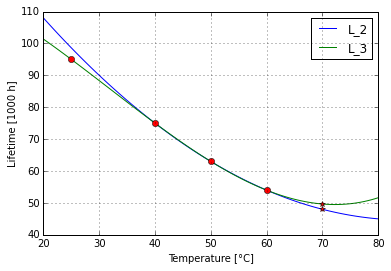

In [15]:
pyl.figure()
pyl.plot(x_pl,l2_pl,x_pl,l3_pl,temp,life,'ro', [70.,70.], [l2_70, l3_70],'*')
pyl.xlabel(u"Temperature [°C]")
pyl.ylabel(u"Lifetime [1000 h]")
pyl.legend(["L_2", "L_3"])
pyl.grid()